# Estimation of $\pi$ using Monte Carlo Integration

In [1]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
import distrax
import ipywidgets as widget

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

key = jax.random.PRNGKey(0)

2022-05-25 17:14:46.818045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
pml.latexify(width_scale_factor=4)

/home/anand/anaconda3/envs/srip/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


the estimated pi = 3.163200
the standard pi = 3.141593
stderr = 0.092034


/home/anand/anaconda3/envs/srip/lib/python3.7/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


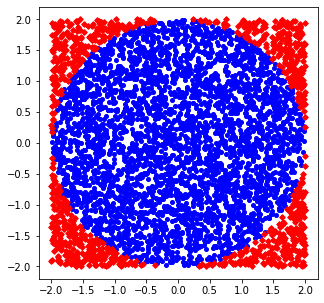

In [8]:
def estimate_pi(num_samples=5000, radius=2):
    global key
    uniform = distrax.Uniform(low=-radius, high=radius)
    x_uniform_samples = uniform.sample(seed=key, sample_shape=num_samples)
    key, subkey = jax.random.split(key)
    y_uniform_samples = uniform.sample(seed=key, sample_shape=num_samples)
    dist = x_uniform_samples**2 + y_uniform_samples**2  # distance from (0,0)

    inside = dist <= radius**2
    samples = 4 * (radius**2) * inside
    integral_estimate = np.mean(samples)
    pi_estimate = integral_estimate / (radius**2)
    std_err = np.sqrt(np.var(samples) / num_samples)

    print(("the estimated pi = %f" % pi_estimate))
    print(("the standard pi = %f" % np.pi))
    print(("stderr = %f" % std_err))

    # plot the samples
    if pml.is_latexify_enabled():
        plt.figure()
        MARKER_SIZE = 1
    else:
        plt.figure(figsize=(5, 5))
        MARKER_SIZE = 4

    plt.plot(x_uniform_samples[inside], y_uniform_samples[inside], "bo", markersize=MARKER_SIZE)
    plt.plot(x_uniform_samples[~inside], y_uniform_samples[~inside], "rD", markersize=MARKER_SIZE)

    pml.savefig("mcEstimatePi_latexified")
    plt.show()


estimate_pi()

In [9]:
widget.interact(estimate_pi, N=(200, 20000, 10), r=(0.5, 5, 0.1))

interactive(children=(IntSlider(value=5000, description='num_samples', max=15000, min=-5000), IntSlider(value=…

<function __main__.estimate_pi(num_samples=5000, radius=2)>